In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, sys
os.chdir("/content/drive/My Drive/ualbany courses/ML Practicum/hw3")

!pip3 install autogluon

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from autogluon.tabular import TabularPredictor

scipy.__version__, np.__version__, pd.__version__

('1.14.1', '1.26.4', '2.2.2')

# Project 3

**Your group member:**

- The deadline is Mar 28th 10:30am. Submission after the deadline will not be graded.



- This is a group projection. Your group only needs to submit one project. You can form a group of 1, 2 or 3.



- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.


- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.


- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.




# California House Price Prediction

In data science job interview, you will be given a large dataset and you need to make the predicition on the test dataset as online assessment usually within 3 hours. It assesses a candidate’s ability to analyze data, extract information, building model and machine learning skills, as well as their ability to take advantage of Python and its data science libraries. In this assignment, you will be given such real world datasets with the training data and testing data. Real world datasets, unlike synthetic data, is very messy, you need to preprocess these data first.

You may use any machine learning algorithm you like, and may tune
it any way you wish. You may use the method and helper functions built into scikit_learn.  you do not need
to implement the method yourself, but may if you wish. If you can think of a way that the unlabeled data would be useful during the training process, you are welcome to let
your classifier have access to it during training.

**Data access:** the data is stored in https://drive.google.com/file/d/13MHfnGwFaxhfj9divCRoUpPfe_ukm1YX/.

**Load Data:** Once you open the link in the brower, make sure you click the "Add shortcut to Drive" and now your google drive should show up the zip file.  Then you run the following code to link colab to your google drive.

In [3]:
data = pd.read_feather('house_sales.ftr')

data.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561







---


---





## Prepare Data
Let's first read in the dataset we used in our Exploratory Data Analysis.

We select a few common columns to make our training fast. You need to select more columns to make your model more accurate.

In [4]:
df = data[['Sold Price', 'Sold On', 'Type', 'Year built', 'Bedrooms', 'Bathrooms']].copy()


In [5]:
df

,Sold Price,Sold On,Type,Year built,Bedrooms,Bathrooms
0,"$2,000,000",01/31/20,SingleFamily,No Data,2,2.0
1,"$2,100,000",02/25/21,SingleFamily,1951,3,3.0
2,"$1,125,000",11/06/19,SingleFamily,1954,3,2.0
3,"$36,250,000",10/02/20,Apartment,1989,0,0.0
4,"$140,000",10/19/20,VacantLand,No Data,None,None
...,...,...,...,...,...,...
164939,"$563,527",02/19/21,Condo,1991,2,2.0
164940,"$2,650,000",05/31/18,Condo,2009,3,3.0
164941,"$1,357,000",11/04/19,Condo,2019,2,None
164942,"$1,400,000",07/23/20,SingleFamily,1973,4,3.0


We copy the code from EDA to convert `Sold Price` to numerical values, which is our prediction target. We also remove examples whose prices are too high or too low.

In [6]:
c = 'Sold Price'
if c in df.select_dtypes('object').columns:
    df.loc[:,c] = np.log10(
            pd.to_numeric(df[c].replace(r'[$,-]', '', regex=True)) + 1)
df = df[(df['Sold Price'] >= 4 ) & (df['Sold Price'] <= 8 )]

In [7]:
df["Sold Price"]

,Sold Price
0,6.30103
1,6.32222
2,6.051153
3,7.559308
4,5.146131
...,...
164939,5.750915
164940,6.423246
164941,6.13258
164942,6.146128


We use the house sales between 2021-2-15 and 2021-3-1 as our test data. You can use any example before 2021-2-15, but not after. In other words, we pretend we are launching our model on 2021-2-15 and testing it for 2 weeks. Here we only use sales in 2021 for fast training, but you can use more to improve accuracy.

In [8]:
test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
df['Sold On'] = pd.to_datetime(df['Sold On'], errors='coerce')
train = df[(df['Sold On'] >= train_start) & (df['Sold On'] < test_start)]
test = df[(df['Sold On'] >= test_start) & (df['Sold On'] < test_end)]
len(train), len(test)

<ipython-input-8-d336bd6ae04b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Sold On'] = pd.to_datetime(df['Sold On'], errors='coerce')
<ipython-input-8-d336bd6ae04b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sold On'] = pd.to_datetime(df['Sold On'], errors='coerce')


(24872, 11510)

Define our evaluation metric.

**Metric/Score:** Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [9]:
def rmsle(y_hat, y):
    # we already used log prices before, so we only need to compute RMSE
    return sum((y_hat - y)**2 / len(y))**0.5

## AutoGluon Baseline

We provide a baseline model trained by AutoGluon (AG). AG is an automl tool that performs automatic feature engineering, model selections, and ensemble. You are welcome to use any model and tool in achieving the best results possible in your homework. However, we recommend that you reuse the following training code so that you can focus on data preprocessing.

In [10]:
# label = 'Sold Price'
# predictor = TabularPredictor(label=label).fit(train)

Test the performance of each model.

In [11]:
# predictor.leaderboard(test, silent=True)

Next, we compute the importance of each feature, along with several other metrics. It looks like the `Sold On` feature is not very useful, likely because the houses in the test data were all sold late. You can choose to either remove such a feature, or find a way to extract a more useful presentation from it.

In [12]:
# predictor.feature_importance(test)

Finally, let's predict and evaluate the RMSLE.

In [13]:
# preds = predictor.predict(test.drop(columns=[label]))
# rmsle(preds, test[label])

## Your task
**This project can be used to present in showcase day as extra credits.**

Please include your solution in the following section. (You are welcome to edit and delete code in previous sections).

Your goal is to train a model using the features in the original dataset that minimizes the RMSLE on the validation dataset. While the naïve model achieves an RMSLE of ~0.3, it is possible to achieve an RMSLE of less than 0.08 on the same dataset.

1. **You need to write your own code.**

2. **You need to discuss your findings.**

Here is a list of ideas you could explore:

- More features: We only selected a small set of columns to use in training. You can add more, especially the ones we examined in EDA.
- Data type conversion: Most data columns are strings; you may need to convert them into numerical values.
- Data cleaning: There are NAN and outliers sprinkled throughout the dataset. You should find ways to selectively filter and remove them.
- More examples: We only included sales made in 2021; there is a large number of examples in previous years that you can also include.

In [14]:
# freeing memory
del df
del train
del test

# Notes about the Analysis

This text block is written after all of the analysis has been made and serves as a "Read Me" of sorts to the person looking at this particular document.

This analysis was done in a sequential form. A lot of misinterpretations are kept in for a majority of the models generated simply due to lack of thinking at the time as a way to preserve the methodology used to reach conclusions about these misinterpretations without damaging the learning process made prior to learning about them.

In a way, this document is a story about how we go from the baseline above to the final model, ensuring to include each step made with the reasonings behind each feature inclusion, removal and transformation, rather than just a culmination of the process made to showcase the best model while all the busy work is left behind the scenes.

The downside to this approach is a lot of the code in the latter half relies on certain decisions made in the Intro section. While this isn't too big a deal (the processing time of the data after the Data Screening section is less than 10 seconds), it does lead to a lot of difficulties for modifying the dataframe later on. Because of these creative decisions, there is plenty of optimization to be done to this document.

The first is a data split at the beginning of the Data Screening section. This would reduce the total memory constraints on the document, as we wouldn't be constantly needing to store the entire data file, when we never use more than a fourth of it after the Data Screening section. The reason this wasn't done was due to a lack of foresight about needing to eventually work with the entire dataset.

The second stems from the first. With an increase in memory, it woud be ideal to have a "host" dataframe apart from the main one to house all of the features we are currently using, would want to use, and no longer are using, so that adding and removing features from a model generation is as simple as skimming the desired features from the host dataframe. You can see this approach to a lesser extent in the Model Simplification and Improvement section, but the full development of such a technique was passed on for the sake of the afforementioned creative liberty.

# Intro - Developing Preliminary Model

For the convenience of the reader, the Table of Contents beyond this point has been extensively cared for if one wishes to jump around to other parts of the document without the hassle of manual scrolling.

To rehash our goal, we are attempting to create a model that can best predict the price at which a house is being sold through the use of features in a massive data set. It's important to remember that this dataset is holding "housing" data, but could also include apartment complexes and so on, thus is actually a "property" dataset. For example, just looking at the number of unique values in 'Type', we see the list is massive, mostly due to poor formating on part of the feature itself, but we see *SingleFamily, Apartment, Townhouse, Condo, (Low, Mid,Hi)-Rise (1-3, 4-8, 9+), Luxury* and *Commercial* just to name a few different types of property.

However in the end, the goal is simply to get model features that point to property value overall. We can use this to our advantage (single family homes are typically going to be less expensive than a skyscraper, for example), but will require a lot of work to execute. For now, we need to get a better grasp of the dataset we have.

For convenience, clicking *Run All* will take about $̃2$ minutes, assuming AutoGluon is downloaded and the drive is mounted. This was done by commenting out all of the model generating blocks. All of the models were analyzed after compiling them and the details of the final model are saved in screenshots below the model generation.

## Data Screening

To preface this initial feature screening, we will be considering the entire dataset with all dates and samples to get the best impression of our data before we split it into the metric outlined above and removing outliers based on our target feature **Sold Price**. This may impact our initial impressions of features, as some features could be more or less sparse after the **Sold On** training/testing cutoff dates, but we anticipate it being best for our model to pick features with all of the data in mind.

We start by removing the **Sold Price** samples above, to simplify our work later:

In [15]:
c = 'Sold Price'
if c in data.select_dtypes('object').columns:
    data.loc[:,c] = np.log10(
            pd.to_numeric(data[c].replace(r'[$,-]', '', regex=True)) + 1)
data = data[(data['Sold Price'] >= 4 ) & (data['Sold Price'] <= 8 )]

### First Look

To begin the analysis, we start by printing the names of all columns, just to get a grasp of the potential features in the data. For relative cleanliness, we do so in groupings of nine (picked based on my own monitor size), but can change to any grouping you desire:

In [16]:
# Starting Features: Sold Price, Sold On, Type, Year built,	Bedrooms, Bathrooms

# 'train' and 'test' are our dataframes, with 'data' being the master data frame.
# we can add to train and test by adding to 'df', then breaking at the timing
# thresholds as done above.
def inGroups(df, grouping=9):
    """
    Prints the columns in a data frame in groups for readability

    Args:
        df (Pandas DataFrame): data frame to print column names from
        grouping (int): number of columns to print per line; defaults to 9
    Output:
        numerated lists of length "grouping", containing column names of df
    Returns:
        None
    """
    assert grouping > 0 and type(grouping) == int, "grouping must be a positive integer"
    n = 0
    print_list = []
    for i in df.columns:
        n += 1
        print_list.append(i)
        if n % grouping == 0:
            print(n/grouping, print_list)
            print_list = []
    return None

inGroups(data, grouping=8)

"""
Ideas based on looking at the columns:

Heating/Cooling
Lot Size
Levels
Annual tax amount
Private pool/Pool/Swimming Pool/POOL, etc.
Spa Included
Tax Assessed Value, Listed Price, Last Sold Price
County/Zip code
Rooms
TenantPays
Furnished
# of Stories
Approx # of Acres
# of Fireplaces
YearBuiltEffective
InsuranceExpense, GrossIncome, NetOperatingIncome
# of Buildings
Mobile Home
Guest House SqFt
Geological Hazard
"""

1.0 ['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type', 'Year built', 'Heating']
2.0 ['Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms', 'Full bathrooms', 'Total interior livable area', 'Total spaces']
3.0 ['Has garage', 'Garage spaces', 'Home type', 'Region', 'Elementary School', 'Elementary School Score', 'Elementary School Distance', 'Middle School']
4.0 ['Middle School Score', 'Middle School Distance', 'High School', 'High School Score', 'High School Distance', '3/4 bathrooms', 'Flooring', 'Heating features']
5.0 ['Cooling features', 'Appliances included', 'Laundry features', 'Common walls with other units/homes', 'Fireplace features', 'Virtual tour', 'Parking features', 'Covered spaces']
6.0 ['Has uncovered spaces', 'Attached garage', 'Levels', 'Entry location', 'Private pool', 'Spa included', 'Spa features', 'Patio and porch details']
7.0 ['Fencing', 'View description', 'Lot size', 'Parcel number', 'Special conditions', 'Sewer information', 'Community features', 'Tax

'\nIdeas based on looking at the columns:\n\nHeating/Cooling\nLot Size\nLevels\nAnnual tax amount\nPrivate pool/Pool/Swimming Pool/POOL, etc.\nSpa Included\nTax Assessed Value, Listed Price, Last Sold Price\nCounty/Zip code\nRooms\nTenantPays\nFurnished\n# of Stories\nApprox # of Acres\n# of Fireplaces\nYearBuiltEffective\nInsuranceExpense, GrossIncome, NetOperatingIncome\n# of Buildings\nMobile Home\nGuest House SqFt\nGeological Hazard\n'

After a preliminary scan of the features, we've come with a list of potential features to include in our model based on perceived added value to a property (picked solely on my own perconceived notions of value in a home) and analyze their contents of unique values and sparsity:

In [17]:
def uniqueValues(column, want_uniques=False):
    """
    Returns the number of unique values a column has in a Pandas DataFrame

    Args:
        column (Pandas DataFrame): single column from a Pandas DataFrame
        want_uniques (bool): if True, returns a list of the unique values in the
            column; defaults to False
    Returns:
        num_uniques (int): number of unique values in the column
        uniques (list): list of unique values in the column if
            want_uniques == True, None otherwise
    """
    uniques = column.unique()
    num_uniques = len(uniques)
    if want_uniques:
        return num_uniques, uniques
    else:
        return num_uniques, None

def countNaN(column):
    """
    Returns the number of cells with no data entry, whether it be "NaN, "None",
    or "No Data" as the cell value

    Args:
        column (Pandas DataFrame): single column from a Pandas DataFrame
    Output:
        nan_count (int): number of cells with no data entry in the column
    """
    nan_list = ['No Data', 'None']
    for i in nan_list:
        column = column.replace(i, np.nan)
    return column.isna().sum()

prelim_features = [
    'Heating', 'Cooling', 'Lot Size', 'Levels', 'Annual tax amount',
    'Private pool', 'Spa included', 'Tax assessed value', 'Listed Price',
    'Last Sold Price', 'County', 'Zip Code', 'Rooms', 'TenantPays', 'Furnished',
    'Approx # of Acres', 'Mobile Home', 'Guest House SqFt', 'Geological Hazard'
]

prelim_df = data[prelim_features].copy()
print("total number of preliminary features:",len(prelim_df.columns))
total_samples = len(prelim_df)
print("total number of samples:", total_samples)
print("\n")

print("Info on Features in Preliminary Set:")
print()

for feature in prelim_features:
    num_uniques, uniques = uniqueValues(prelim_df[feature], want_uniques=True)
    print(f"{feature} - Type: {prelim_df.dtypes[feature]}")
    # print("uniques:", uniques)
    print("number of uniques:", num_uniques)
    if num_uniques <= 20:
        print("uniques:", uniques)
    nan_count = countNaN(prelim_df[feature])
    print(f"number of non-empty cells (out of {total_samples}): {total_samples - nan_count}")
    print(f"percent full: {np.round(((total_samples-nan_count)/total_samples)*100, 3)}%")
    print()

prelim_df.head()

total number of preliminary features: 19
total number of samples: 160839


Info on Features in Preliminary Set:

Heating - Type: object
number of uniques: 3279
number of non-empty cells (out of 160839): 121228
percent full: 75.372%

Cooling - Type: object
number of uniques: 1041
number of non-empty cells (out of 160839): 79314
percent full: 49.313%

Lot Size - Type: object
number of uniques: 20
uniques: [None '20 - 39.99 Acres' '15 - 19.99 Acres' '0 - 3.99K' '40 - 79.99 Acres'
 '80 + Acres' '.5 - .74 Acres' '.25 - .49 Acres' '10 - 14.99 Acres'
 '2 - 4.99 Acres' '2 - 2.99 Acres' '1 - 1.99 Acres' '5 - 9.99 Acres'
 'City' '10 - 19.99 Acres' '4 - 4.99 Acres' 'Oversized' '4 - 5.99K'
 '3 - 3.99 Acres' '8 - 9.99K']
number of non-empty cells (out of 160839): 77
percent full: 0.048%

Levels - Type: object
number of uniques: 77
number of non-empty cells (out of 160839): 41321
percent full: 25.691%

Annual tax amount - Type: object
number of uniques: 31564
number of non-empty cells (out of 160839

,Heating,Cooling,Lot Size,Levels,Annual tax amount,Private pool,Spa included,Tax assessed value,Listed Price,Last Sold Price,County,Zip Code,Rooms,TenantPays,Furnished,Approx # of Acres,Mobile Home,Guest House SqFt,Geological Hazard
0,No Data,No Data,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Central,"Central Air, Dual",None,Two,"$22,330",Yes,Yes,"$1,829,308","$1,950,000","$1,690,000",None,None,None,None,None,None,None,None,None
2,Central Forced Air - Gas,Central AC,None,None,"$13,472",None,None,"$1,125,000","$1,299,888","$482,000",None,None,None,None,None,None,None,None,None
3,Other,No Data,None,None,"$175,211",Yes,None,"$14,521,205",None,None,None,None,None,None,None,None,None,None,None
4,No Data,No Data,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


First and foremost, we note that literally every feature in our list has "object" as a datatype, while we can see clearly that a feature of **Bedrooms** should be Int64. This is due to the inclusion of "None" or "No Data" in many of the features' cells. While dealing with this problem isn't too difficult for AutoGluon in terms of a gerneral model generation, it spawns some issues with how we wish our data to be received by AutoGluon on a case-by-case basis (when to and not to treat "None" as a 0, or as a literal "No Data" entry).

Other issues in this realm are typical numerical features that are entered in the data in an inconvenient way. We've aleadly seen this with our monetary features, but can see a similar issue with something like **Lot Size**, where we get ranges with units, or **Levels**, where its entries are numeric text of various types ("Two", "2", "Two Levels", "Two Story", to name a few).

We can see a lot of these features are relatively empty, generally due to a lack of input, but also due to spliting one feature into multiple instances. With the total number of samples we have to work with being $164943$, some of these features having over $100000$ **NaN** entries is concerning, but workable, while others have over $160000$ **NaN** values, such as **Zip Code** with only $456$ non-empty cells. Some of these features are still useful however, such as **Guest House SqFt**, as having a guest house on the property likely implies an increase in value and is reasonably uncommon, thus has low data.

Another addtional point to note is the number of uniques to number of non-empties ratio for some features. When both of these numbers are in the thousands and AREN'T numeric, we know it's going to be difficult to deal with such a feature, since it's likely a description of some kind.

### Second Look

With all of the above complications in mind, we'll need to approach this differently. To start, we want to begin with features that are relatively rich in data. From here, we can consider features with better clarity before moving to sparser features, split features or features with inconvenient data entry.

We move to consider the entire dataset and parse through each feature to see how many **NaN**s they contain. We make a master list of features, with a number of entries equal to $(\text{max_cut_off}/\text{cut_off})+1$. Using the $\text{int}$ method, we can floor each **NaN** count to the index we want it in. As a preliminary, we have a cutoff start and interval of $20000$ and a max **NaN** count of $160000$:

In [18]:
all_features = data.columns
print("total number of features:",len(all_features))

# controls
cut_off = 10000 # start (each indexed list cutoff increases by this value)
cut_off_max = 160000 # prefered to be a multiple of cut_off, but works regardless if not
master_feature_list = []

for i in range(int(cut_off_max/cut_off)+1):
    master_feature_list.append([])

for feature in all_features:
    num_uniques, uniques = uniqueValues(data[feature])
    num_nans = countNaN(data[feature])
    idx = int(num_nans/cut_off)
    master_feature_list[idx].append(feature)


for i in range(len(master_feature_list)):
    if i==int(cut_off_max/cut_off):
        print(f"number of features with num_nans more than {(i+1)*cut_off}: {len(master_feature_list[i])}")
    else:
        print(f"number of features with num_nans between {i*cut_off} and {(i+1)*cut_off -1}: {len(master_feature_list[i])}")


total number of features: 1789
number of features with num_nans between 0 and 9999: 12
number of features with num_nans between 10000 and 19999: 10
number of features with num_nans between 20000 and 29999: 4
number of features with num_nans between 30000 and 39999: 4
number of features with num_nans between 40000 and 49999: 1
number of features with num_nans between 50000 and 59999: 5
number of features with num_nans between 60000 and 69999: 3
number of features with num_nans between 70000 and 79999: 2
number of features with num_nans between 80000 and 89999: 3
number of features with num_nans between 90000 and 99999: 2
number of features with num_nans between 100000 and 109999: 7
number of features with num_nans between 110000 and 119999: 6
number of features with num_nans between 120000 and 129999: 16
number of features with num_nans between 130000 and 139999: 17
number of features with num_nans between 140000 and 149999: 19
number of features with num_nans between 150000 and 159999:

It's clear that our data is very sparse, with over $90\%$ of our features having over $90\%$ of their entries empty, but again, some features use "NaN" or "No Data" as a "No" for a yes/no question.

Either way, it's best for us to work with the features without many NaNs first. Let's consider the features with all of the features with fewer than $160000$ NaN entries:

In [19]:
cutoff_features = []
idx_cutoff = len(master_feature_list)
for i in range(idx_cutoff):
    cutoff_features += master_feature_list[i]
    print(f"Between {i*cut_off} and {(i+1)*cut_off -1}: {master_feature_list[i]}")
print(len(cutoff_features))

cutoff_df = data[cutoff_features]
cols = cutoff_df.columns
print(cols[:50])
print(cols[50:100])
print(cols[100:])

Between 0 and 9999: ['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type', 'Parking', 'Total spaces', 'Garage spaces', 'Home type', 'Region', 'Zip']
Between 10000 and 19999: ['Year built', 'Bedrooms', 'Total interior livable area', 'Elementary School', 'Elementary School Score', 'Elementary School Distance', 'High School', 'High School Distance', 'Parcel number', 'Tax assessed value']
Between 20000 and 29999: ['Bathrooms', 'High School Score', 'Lot size', 'Annual tax amount']
Between 30000 and 39999: ['Heating', 'Parking features', 'Listed On', 'Listed Price']
Between 40000 and 49999: ['Heating features']
Between 50000 and 59999: ['Lot', 'Full bathrooms', 'Middle School', 'Middle School Score', 'Middle School Distance']
Between 60000 and 69999: ['Flooring', 'Appliances included', 'Laundry features']
Between 70000 and 79999: ['Last Sold On', 'Last Sold Price']
Between 80000 and 89999: ['Cooling', 'Cooling features', 'Roof']
Between 90000 and 99999: ['Special conditions', 'Constru

Within these features, we can have a good starting point for our model. The location of the building will be very impactful, especially in California. In our preliminary check of features, we found "Zip code" was very empty, but here find that "Zip" is much more filled. We will use this as our location feature in some capacity later on. Many of the other features here also seem to be quantitatively useful, others very useful but with some categorizing to accompany them, etc.


In [20]:
# freeing memory
del prelim_df
del cutoff_df

In [21]:
data['Stories'].unique()

array([None, '1', '3', '2', '6', 'Two', '9', '21', 'Three', 'Two Story',
       '4', 'Three or More Stories', 'One Story', '5', 'One', '2 Story',
       '8', '1 Story', '7', '1.0', '2.0', '3.0', '9.0', '4.0', '6.0',
       '19', '11', '1.5', '52.0', '12', 'Other', '13', '27', '2 Stories',
       'Tri-Level', 'Split Level', '10', 'Multi/Split', '18', '20', '14',
       '11.0', '2.5', '7.0', '5.0', '8.0', '17', '54', '23', '3 Story',
       '40.0', '24', '60', 'Split', '22', '10.0', '16', '15', '56', '32',
       '22.0', '42', 'Four +', '33'], dtype=object)

## Preliminary Feature Inclusions

Our goal is to add as many features as we think will add to our model, but not so much to bog down with unnecessary or repeated information. Adding the features of BOTH zipcode and county does exactly this and we'll avoid such cases as they come. Additionally, there are a lot of features with multiple instances in our data of various sparsity. We'll save these for later as they could prove difficult to work with, if even useful.

The features we will add here are considered from the above sparsity analysis as well as some general expectation of what influences property value. From minimal research, we know that property value is most impacted by **Location, Size, Age** and **Comparables**.

**Comparables**, or "**Comps**", are a difficult feature to quantify, as it relies on the recent sales of neighboring/similar real estate, a property's unique locale, HOA quality, local schooling options, and so on. **Comps** are both the most important and most difficult features to include in our model, so we will handle them with care.

Other things we can add to improve our model are property specific features such as appliances, furnature, pool inclusion, bathroom/bedroom counts and so on. These will be difficult to add to fruition as much of these features are sparse to the point of nearly useless, multiple feature instances or overly descriptive, and sometimes all of the above. These will be among the last things we add to our model.

As a first model, we simply want to add features with relative nonchalance to see where we are at before engineering anything too heavily, allowing AutoGluon to do what it seems best for now.

For each added feature, we include a similar baseline observation of the number of NaN and uniqueness as done above. If one wishes to ignore such observations from printing, we include a control here to turn it off:

In [22]:
def observing(column_df, want_uniques=False):
    """
    Outputs the number of NaN cells and unique values for each column in columns

    Args:
        columns (Pandas DataFrame): columns to observe
        want_uniques (bool): if True, also prints a list of the unique values in
            each column; defaults to False
    Output:
        information regarding each column in columns, including number of NaN
            cells, number of unique values and (optional) list of unique values
    Returns:
        None
    """
    for feature in column_df.columns:
        num_uniques, uniques = uniqueValues(column_df[feature], want_uniques=want_uniques)
        print(f"{feature} - Type: {column_df.dtypes[feature]}")
        # print("uniques:", uniques)
        print("number of uniques:", num_uniques)
        if want_uniques:
            print("uniques:", uniques)
        nan_count = countNaN(column_df[feature])
        print(f"number of non-empty cells (out of {total_samples}): {total_samples - nan_count}")
        print(f"percent full: {np.round(((total_samples-nan_count)/total_samples)*100, 3)}%")
        print()

observations = False

### Basic Features

Let's get the easier stuff into our model first. We have plenty of basic features accounted for in the initial baseline model above, but we will consider them here. For each feature added in this section, we will replace any and all **None** or **No Data** entries in cells into **NaN** elements instead.

Of the starting features, we must include **Sold Price** (our target) and **Sold On** (our training/testing metric). **Year built** and **Bathrooms** are fairly simplistic numeric features we can add and convert to numeric.

**Type** is an intricate feature we will leave in our model for our preliminary model, but make a heavy note of its intricacy and potential to confuse our model. For now, we will follow the example of the baseline and leave it unaltered.

**Bedrooms** is another tricky feature that mostly contains numeric entries, but also contains overly descriptive strings that make it not so simple to parse. We will want to deal with this later, but for now we'll leave it unaltered.

We will also take this time to convert **Sold On** to the pandas calendar form, since it is convenient to do it now:

In [23]:
def convNaN(column):
    """
    Converts all None and No Data entries in a DataFrame column to NaN

    Args:
        column (Pandas DataFrame): column to convert
    Returns:
        column (Pandas DataFrame): converted column
    """
    nan_list = ['No Data', 'None']
    for i in nan_list:
        column = column.replace(i, np.nan)
    return column

start_features = ['Sold Price', 'Sold On', 'Type', 'Year built', 'Bedrooms', 'Bathrooms']
prelim_features = [] + start_features

prelim_df = data[start_features].copy()

for c in start_features:
    print(c)
    prelim_df[c] = convNaN(prelim_df[c])
    if c == 'Year built' or c == 'Bathrooms':
        prelim_df[c] = pd.to_numeric(prelim_df[c])

if observations:
    observing(prelim_df[start_features])

prelim_df.head()

Sold Price
Sold On
Type
Year built
Bedrooms
Bathrooms


,Sold Price,Sold On,Type,Year built,Bedrooms,Bathrooms
0,6.30103,01/31/20,SingleFamily,NaN,2,2.0
1,6.32222,02/25/21,SingleFamily,1951.0,3,3.0
2,6.051153,11/06/19,SingleFamily,1954.0,3,2.0
3,7.559308,10/02/20,Apartment,1989.0,0,0.0
4,5.146131,10/19/20,VacantLand,NaN,None,NaN


In [24]:
temp = prelim_df['Sold On'].copy()
temp = pd.to_datetime(temp)
prelim_df = prelim_df.drop(columns=['Sold On'])
prelim_df['Sold On'] = temp
prelim_df.head()

<ipython-input-24-c737e36f8b08>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(temp)


,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19


To begin with features not in the starting features, **Zip** is a must add, as it is complete and gives location data. This is a major pointer for price, as many regions in California are much more expensive to live in than others. It isn't a surefire regional feature, but will do for now. We will halt on standardizing it for now.

Another good feature is **Stories**, though there are too many descriptors to easily make this numeric. We leave it to AutoGluon for now.

In [25]:
easy_features = ['Zip', 'Stories']
prelim_features += easy_features

prelim_df = pd.concat([prelim_df, data[easy_features]], axis=1)
prelim_df['Zip'] = pd.to_numeric(prelim_df['Zip'])
prelim_df['Stories'] = convNaN(prelim_df['Stories'])

if observations:
    observing(prelim_df[easy_features])

prelim_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None


### Monetary Features

These features are also relatively safe to deal with, but require us to adjust them, albeit in a very trivial way using the same method we used for reframing **Sold Price**

Tax information types are also very easy to work with given our consistent method of parsing them. Something like **Tax assessed value** seems to be an incredibly impactful feature to include, as are **Listed price** and **Annual tax amount**.

**Last sold price** also seems to be a useful feature to include, but with caution. California has a high prevalance of "fixer-upper"s, where people will buy a low value home, work on it, then sell it for higher value. We will add it with caution.

There is also a case of potential outliers. We'll be more lax about them here and not use the same bounds as used for **Sold Price**, as well as only making the entries into **NaN** rather than completely deleting the samples:

In [26]:
monetary_features = ['Tax assessed value', 'Listed Price', 'Annual tax amount', 'Last Sold Price']
prelim_features += monetary_features

prelim_df = pd.concat([prelim_df, data[monetary_features]], axis=1)

if observations:
    observing(prelim_df[monetary_features])

prelim_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,None,None,None,None
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,"$1,829,308","$1,950,000","$22,330","$1,690,000"
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,"$1,125,000","$1,299,888","$13,472","$482,000"
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,"$14,521,205",None,"$175,211",None
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,None,None,None,None


Here we transform each of these monetary features using the same method the baseline model used for consistency without removing any outliers or **NaN**'s. Also, we will refrain from modifying **Sold Price** until we begin the model generation:

In [27]:
for c in monetary_features:
    if c in prelim_df.select_dtypes('object').columns:
        prelim_df.loc[:,c] = np.log10(
                pd.to_numeric(prelim_df[c].replace(r'[$,-]', '', regex=True)) + 1)
        prelim_df[c] = pd.to_numeric(prelim_df[c])
        prelim_df[c].loc[prelim_df[c] >= 9] = np.nan
        prelim_df[c].loc[prelim_df[c] <= 3] = np.nan

prelim_df[monetary_features].dtypes

<ipython-input-27-036e2d33ea17>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prelim_df[c].loc[prelim_df[c] >= 9] = np.nan
<ipython-input-27-036e2d33ea17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,0
Tax assessed value,float64
Listed Price,float64
Annual tax amount,float64
Last Sold Price,float64


### School Features

While features regarding surrounding schools (or in this case, nearest school) aren't at the forefront of importance for reasons a property may increase in value, we still add these because they aren't very sparse and have very good contingent data. To err on the side of completeness, we will investigate these features in our preliminary model, regardless of what little value they may hold.

The data here comes in triplets of the **Name, Distance** and **Score** of the different levels of school: **Elementary, Middle, High** and **Intermediate**.

Looking at the data regarding **Intermediate School**, the sparsity is quite large for the likely overlapping between it and the **Middle School** triplet. Because of this, we will not be including it in our preliminary model. Additionally, the names of the schools are of little use to us, so we won't be adding them either.

These features are already numeric, so the transformation will be trivial:

In [28]:
school_features = ['Elementary School Distance', 'Elementary School Score',
             'Middle School Distance', 'Middle School Score',
             'High School Distance', 'High School Score']
prelim_features += school_features

prelim_df = pd.concat([prelim_df, data[school_features]], axis=1)

if observations:
    observing(prelim_df[school_features])

prelim_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Elementary School Distance,Elementary School Score,Middle School Distance,Middle School Score,High School Distance,High School Score
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,NaN,NaN,NaN,NaN,0.7,6.0,3.6,5.0,1.4,6.0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,6.262287,6.290035,4.348908,6.227887,0.4,9.0,0.7,9.0,1.2,9.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,6.051153,6.113906,4.129464,5.683048,0.6,4.0,1.7,6.0,0.8,6.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,7.162003,NaN,5.243564,NaN,0.4,7.0,0.8,9.0,0.9,9.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,NaN,NaN,NaN,NaN,23.8,3.0,23.6,3.0,25.8,5.0


In [29]:
# Transformation
for c in school_features:
    prelim_df[c] = pd.to_numeric(prelim_df[c])
prelim_df[school_features].dtypes

,0
Elementary School Distance,float64
Elementary School Score,float64
Middle School Distance,float64
Middle School Score,float64
High School Distance,float64
High School Score,float64


## Preliminary Model

Here we begin the processing of our data into a model.

In [30]:
prelim_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Elementary School Distance,Elementary School Score,Middle School Distance,Middle School Score,High School Distance,High School Score
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,NaN,NaN,NaN,NaN,0.7,6.0,3.6,5.0,1.4,6.0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,6.262287,6.290035,4.348908,6.227887,0.4,9.0,0.7,9.0,1.2,9.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,6.051153,6.113906,4.129464,5.683048,0.6,4.0,1.7,6.0,0.8,6.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,7.162003,NaN,5.243564,NaN,0.4,7.0,0.8,9.0,0.9,9.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,NaN,NaN,NaN,NaN,23.8,3.0,23.6,3.0,25.8,5.0


### Data Preparation Pipeline

In [31]:
def rmsle(y_hat, y):
    # chosen metric
    return sum((y_hat - y)**2 / len(y))**0.5

In [32]:

test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
train = prelim_df[(prelim_df['Sold On'] >= train_start) & (prelim_df['Sold On'] < test_start)]
test = prelim_df[(prelim_df['Sold On'] >= test_start) & (prelim_df['Sold On'] < test_end)]
len(train), len(test)


(24872, 11510)

### AutoGluon Model Generation

In [33]:
# Predictor
# label = 'Sold Price'
# predictor = TabularPredictor(label=label).fit(train)

In [34]:
# Leaderboard
# predictor.leaderboard(test, silent=True)

In [35]:
# Feature Importance
# predictor.feature_importance(test)

In [36]:
# RMSLE
# preds = predictor.predict(test.drop(columns=[label]))
# rmsle(preds, test[label])

### Analysis of the Output

To reiterate the baseline, the initial model with just the starting features had $\text{RMSLE}_{\text{base}} = 0.273$. Our preliminary model smashed that score, achieving $\text{RMSLE}_{\text{prelim}} = 0.107$. This is quite close to the soft end goal score of $\text{RMSLE}\le.08,$ so it's safe to say we are on the right track.

Looking at the leaderboards, the only metric we scored worse on were the $\text{KNeighborsUnif}$ and $\text{KNeighborsDiff}$ models for $\text{score_test}$. All other models we at least cut in half for $\text{score_test}$, and for $\text{score_val}$, every model improved substantially save the afformentioned $\text{KNeighbors}$ models.

The feature importance is quite insightful. We already knew the impact of **Sold On** would be low from the baseline, but most of the other features also declined quite a bit in leu of the monetary features, specifically **Listed Price**.

The school features didn't perform well either, but we can parse some useful information. For example, the **Elementary** and **Middle School Scores** are relatively important, as well as **High School Distance**. In the next model, we'll remove the distances (for now) and engineer an average for the scores.

# Feature Engineering - Developing Next Model

With our first model generated, we wish to improve this by engineering some features of our own rather than looking at features within the data itself, as well as removing some not-so-useful features shown by AutoGluon.

## Editing our Preliminary Model

For this model, we want to solve some of the issues with our current model, namely removing not so useful, while still ensuring certain characteristics about them remain. We can do this using feature engineering to combine features, or simply remove them altogether.

One such example is **Sold On** and **Year Built**, whose data is very closely intertwined. While **Year Built** had pretty good perfomance in our baseline, it fell off quite hard in the preliminary. We want to remove **Sold On** from our model, but we want to ensure we are capturing the age of the home at the time of sale. This new **Age at Sale** feature will replace both **Sold On** and **Year Built** in our next model.

Another example are the schooling features. Since neither distance nor score performed too well, we are going to remove the distances and improvise a new feature **Average School Score**, where we just take the average of the scores.

**Stories** is a tricky feature to deal with. It didn't perform very well in our model, but in premise it seems like it could still affect our model in a decent way. We will keep it for our next model, but if it doesn't improve, we will remove it.

For this model, we copy directly the preliminary model, so no numeric adjustments need to be made for the applicable features, and the removal of outliers for **Sold Price** also does not need to occur.

In [37]:
next_df = prelim_df.copy()
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Elementary School Distance,Elementary School Score,Middle School Distance,Middle School Score,High School Distance,High School Score
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,NaN,NaN,NaN,NaN,0.7,6.0,3.6,5.0,1.4,6.0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,6.262287,6.290035,4.348908,6.227887,0.4,9.0,0.7,9.0,1.2,9.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,6.051153,6.113906,4.129464,5.683048,0.6,4.0,1.7,6.0,0.8,6.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,7.162003,NaN,5.243564,NaN,0.4,7.0,0.8,9.0,0.9,9.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,NaN,NaN,NaN,NaN,23.8,3.0,23.6,3.0,25.8,5.0


In [38]:
# Freeing Memory
del prelim_df

### Age at Sale

The first and most obvious of features to look at from what we researched about property value, age is a good place as any to start as all it takes is a simple calculation using features we already have in our model. For our model, we wish to impliment a feature called **Age at Sale**.

For simplicity, this feature will have a unit of years and will be calculated by taking the year in **Sold On** and subtracting it by **Year Built**. We won't remove **Year Built** from our model:



In [39]:
def getYear(ts):
    return ts.year

temp_df = next_df[['Sold On', 'Year built']].copy()
temp_df['Year Sold On'] = temp_df['Sold On'].map(getYear)
temp_df['Age at Sale'] = temp_df['Year Sold On'] - temp_df['Year built']

next_df = pd.concat([next_df, temp_df['Age at Sale']], axis=1)
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Elementary School Distance,Elementary School Score,Middle School Distance,Middle School Score,High School Distance,High School Score,Age at Sale
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,NaN,NaN,NaN,NaN,0.7,6.0,3.6,5.0,1.4,6.0,NaN
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,6.262287,6.290035,4.348908,6.227887,0.4,9.0,0.7,9.0,1.2,9.0,70.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,6.051153,6.113906,4.129464,5.683048,0.6,4.0,1.7,6.0,0.8,6.0,65.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,7.162003,NaN,5.243564,NaN,0.4,7.0,0.8,9.0,0.9,9.0,31.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,NaN,NaN,NaN,NaN,23.8,3.0,23.6,3.0,25.8,5.0,NaN


We will remove **Sold On** after we create the training and testing sets, as we use it to create the training and testing sets.

### Average School Score

This feature may take a bit more work, as we do not want to overly include **NaN** values. Thankfully, the $\text{.mean}$ method in Pandas is very friendly when it comes to taking averages with **NaN**:

In [40]:
scores_df = next_df[['Elementary School Score', 'Middle School Score', 'High School Score']].copy()
scores_df['Average School Score'] = scores_df.mean(axis=1)

observing(scores_df)
num_uniques, uniques = uniqueValues(scores_df['Average School Score'], True)
print("number of uniques:", num_uniques)
print("uniques:", uniques)

Elementary School Score - Type: float64
number of uniques: 11
number of non-empty cells (out of 160839): 142084
percent full: 88.339%

Middle School Score - Type: float64
number of uniques: 11
number of non-empty cells (out of 160839): 102556
percent full: 63.763%

High School Score - Type: float64
number of uniques: 11
number of non-empty cells (out of 160839): 140728
percent full: 87.496%

Average School Score - Type: float64
number of uniques: 37
number of non-empty cells (out of 160839): 153785
percent full: 95.614%

number of uniques: 37
uniques: [ 5.66666667  9.          5.33333333  8.33333333  3.66666667  4.66666667
  6.66666667         nan  6.          7.33333333  5.          7.5
  3.33333333  7.          8.          4.33333333  2.          3.
  2.33333333  7.66666667  6.5         6.33333333  5.5         2.5
  8.5         3.5         4.          9.33333333  4.5         8.66666667
  2.66666667  1.5         1.          9.5        10.          1.66666667
  9.66666667]


From a quick check at the uniques, we can see that there are no values greater than 10, so we'll assume everything worked out fine.

In [41]:
next_df = pd.concat([next_df, scores_df['Average School Score']], axis=1)
next_df = next_df.drop(columns=school_features)
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Zip,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,95046,None,NaN,NaN,NaN,NaN,NaN,5.666667
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,91011,None,6.262287,6.290035,4.348908,6.227887,70.0,9.000000
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,95051,1,6.051153,6.113906,4.129464,5.683048,65.0,5.333333
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,95035,3,7.162003,NaN,5.243564,NaN,31.0,8.333333
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,92561,None,NaN,NaN,NaN,NaN,NaN,3.666667


### Standard Zip

While leaving with **Zip** the way it is seems to be a fine path forward, we'll test in this model a typical standardization instead to see if it improves or stays the same:

In [42]:
zip_df = next_df[['Zip']].copy()
zip_df['Std Zip'] = (zip_df['Zip'] - zip_df['Zip'].mean())/zip_df['Zip'].std()

next_df = pd.concat([next_df, zip_df['Std Zip']], axis=1)
next_df = next_df.drop(columns=['Zip'])
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Stories,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Std Zip
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,None,NaN,NaN,NaN,NaN,NaN,5.666667,0.866800
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,None,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,-0.929127
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,1,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,0.869026
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,3,7.162003,NaN,5.243564,NaN,31.0,8.333333,0.861904
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,None,NaN,NaN,NaN,NaN,NaN,3.666667,-0.239242


## New Features

We now turn our attention to adding a few features that could be useful with respect to the typical home value increases, such as appliances, HVAC and furnature. We can also consider pool and spa, but these features have a plethora of instances in our features. If anything, we will just include the least sparse occurance, though it will not be completely indicative of the dataset. Lastly in this vein is something representing a property's Home Owner's Association. It too is in the weeds of having many inclusions, but we will look into it regardless.

One feature we haven't yet introduced is something relating to the property area or acreage. We've waited until now because the inclusion of such a feature requires some engineering, but we will do so here.

Since the next_df is in a different total dimension due to the reduction of the **Sold Price** target, we will wait to add all of these features until we have cut them down in the same way as above.

In [43]:
new_additions = data['Sold Price'].copy()

### Property Size

The amount of space a property takes up can be slightly misleading, especially in a city-dense state like California, but we would like to include a feature of it anyways. We consider **Total interior livable area**, a feature that describes the internal space of the property, and **Lot size**, a feature that states the external space the property occupies:

In [44]:
space_features = ['Total interior livable area', 'Lot size']
space_df = data[space_features].copy()

observing(space_df, True)

space_df.head()

Total interior livable area - Type: object
number of uniques: 6725
uniques: ['2,000 sqft' '2,806 sqft' '1,517 sqft' ... '7,224 sqft' '364 sqft'
 '7,150 sqft']
number of non-empty cells (out of 160839): 143410
percent full: 89.164%

Lot size - Type: object
number of uniques: 17994
uniques: [None '13,168 sqft' '4,795 sqft' ... '14,509 sqft' '27,400 sqft'
 '228,690 sqft']
number of non-empty cells (out of 160839): 133003
percent full: 82.693%



,Total interior livable area,Lot size
0,"2,000 sqft",None
1,"2,806 sqft","13,168 sqft"
2,"1,517 sqft","4,795 sqft"
3,"98,052 sqft",4.10 Acres
4,None,None


Both of these features are tricky to numerate, **Lot size** in particular, since it contains two different types of units. Dealing with this will be tricky by hand, so we will let AutoGluon determine the best course. If it appears a poor inclusion, we will fix it up for the following model.

In [45]:
new_additions = pd.concat([new_additions, space_df], axis=1)
new_additions.head()

,Sold Price,Total interior livable area,Lot size
0,6.30103,"2,000 sqft",None
1,6.32222,"2,806 sqft","13,168 sqft"
2,6.051153,"1,517 sqft","4,795 sqft"
3,7.559308,"98,052 sqft",4.10 Acres
4,5.146131,None,None


### Property Values

Here we will include three relatively open ended features similar to the **Type** feature: **Heating, Cooling** and **Appliances Included**. These features we will add without much modifying to see how they do:

In [46]:
new_additions = pd.concat([new_additions, data[['Heating', 'Cooling', 'Appliances included']]], axis=1)
new_additions.head()

,Sold Price,Total interior livable area,Lot size,Heating,Cooling,Appliances included
0,6.30103,"2,000 sqft",None,No Data,No Data,None
1,6.32222,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang..."
2,6.051153,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr..."
3,7.559308,"98,052 sqft",4.10 Acres,Other,No Data,None
4,5.146131,None,None,No Data,No Data,None


We will also add **Private pool** and **Spa included** as property values. These features are boolean, with just Yes or None as entries. They will be very easy to add to our model:

In [47]:
pool_spa = data[['Private pool', 'Spa included']].copy()
pool_spa['Private pool'] = pool_spa['Private pool'].str.len()>0
pool_spa['Private pool'] = pool_spa['Private pool'].astype(int)
pool_spa['Spa included'] = pool_spa['Spa included'].str.len()>0
pool_spa['Spa included'] = pool_spa['Spa included'].astype(int)

new_additions = pd.concat([new_additions, pool_spa], axis=1)
new_additions.head()

,Sold Price,Total interior livable area,Lot size,Heating,Cooling,Appliances included,Private pool,Spa included
0,6.30103,"2,000 sqft",None,No Data,No Data,None,0,0
1,6.32222,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",1,1
2,6.051153,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",0,0
3,7.559308,"98,052 sqft",4.10 Acres,Other,No Data,None,1,0
4,5.146131,None,None,No Data,No Data,None,0,0


### HOA

We would like to pick an HOA variable, but many of them are too sparse or has tricky units. We will engineer a simple boolean feature for this instead from two, leaning towards simply stating if the property has one or not.

In [48]:
hoa_features = ['HOA', 'HOA fee', 'HOA Exist Y/N', 'Has HOA fee']
hoa_df = data[hoa_features].copy()

observing(hoa_df, True)

hoa_df.head()

HOA - Type: object
number of uniques: 2123
uniques: [None '$405 monthly' '$379 monthly' ... '$297 quarterly' '$2,207 annually'
 '$710 annually']
number of non-empty cells (out of 160839): 37519
percent full: 23.327%

HOA fee - Type: object
number of uniques: 2124
uniques: [None '$405 monthly' '$379 monthly' ... '$297 quarterly' '$2,207 annually'
 '$710 annually']
number of non-empty cells (out of 160839): 37476
percent full: 23.3%

HOA Exist Y/N - Type: object
number of uniques: 3
uniques: [None '0.0' '1.0']
number of non-empty cells (out of 160839): 30835
percent full: 19.171%

Has HOA fee - Type: object
number of uniques: 3
uniques: [None 'Yes' 'No']
number of non-empty cells (out of 160839): 28143
percent full: 17.498%



,HOA,HOA fee,HOA Exist Y/N,Has HOA fee
0,None,None,None,None
1,None,None,None,None
2,None,None,0.0,None
3,None,None,None,None
4,None,None,None,Yes


For each of these features, we are going to do convert them to a boolean. Each is different, so we will do them individually. The premise is to convert all nonempty cells as True in the fee features, the Y/N one we can convert to numeric and the one with Yes and No entries we can just compare the lengths to be greater than 2.

After that, we will compare each of the samples using $\text{.any()}$ and then finally convert the boolean to $0$ and $1$ as the feature **Has HOA** :

In [49]:
hoa_df['HOA'] = hoa_df['HOA'].str.len()>0
hoa_df['HOA fee'] = hoa_df['HOA fee'].str.len()>0
hoa_df['HOA Exist Y/N'] = pd.to_numeric(hoa_df['HOA Exist Y/N'])>0
hoa_df['Has HOA fee'] = hoa_df['Has HOA fee'].str.len()>2

hoa_df['Has HOA'] = hoa_df.any(axis=1)
hoa_df['Has HOA'] = hoa_df['Has HOA'].astype(int)

new_additions = pd.concat([new_additions, hoa_df['Has HOA']], axis=1)
new_additions.head()

,Sold Price,Total interior livable area,Lot size,Heating,Cooling,Appliances included,Private pool,Spa included,Has HOA
0,6.30103,"2,000 sqft",None,No Data,No Data,None,0,0,0
1,6.32222,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",1,1,0
2,6.051153,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",0,0,0
3,7.559308,"98,052 sqft",4.10 Acres,Other,No Data,None,1,0,0
4,5.146131,None,None,No Data,No Data,None,0,0,1


## Next Model Generation

We start the process of generating our next model.

### Adding Features to Model

We need to remove the outliers from the new_additions data frame before concatenating it with next_df:

In [50]:
new_additions = new_additions.drop(columns=['Sold Price'])
next_df = pd.concat([next_df, new_additions], axis=1)
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Stories,Tax assessed value,Listed Price,Annual tax amount,...,Average School Score,Std Zip,Total interior livable area,Lot size,Heating,Cooling,Appliances included,Private pool,Spa included,Has HOA
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,None,NaN,NaN,NaN,...,5.666667,0.866800,"2,000 sqft",None,No Data,No Data,None,0,0,0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,None,6.262287,6.290035,4.348908,...,9.000000,-0.929127,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",1,1,0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,1,6.051153,6.113906,4.129464,...,5.333333,0.869026,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",0,0,0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,3,7.162003,NaN,5.243564,...,8.333333,0.861904,"98,052 sqft",4.10 Acres,Other,No Data,None,1,0,0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,None,NaN,NaN,NaN,...,3.666667,-0.239242,None,None,No Data,No Data,None,0,0,1


In [51]:
del new_additions
del hoa_df
del pool_spa
del space_df
del scores_df
del zip_df
del temp_df

### Generating Model

Now, we repeat the pipeline we used before:

In [52]:
test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
train = next_df[(next_df['Sold On'] >= train_start) & (next_df['Sold On'] < test_start)]
test = next_df[(next_df['Sold On'] >= test_start) & (next_df['Sold On'] < test_end)]
len(train), len(test)

(24872, 11510)

As a warning, this training takes close to half an hour to fully complete.

In [53]:
# Predictor
# label = 'Sold Price'
# predictor = TabularPredictor(label=label).fit(train)

In [54]:
# Leaderboard
# predictor.leaderboard(test, silent=True)

In [55]:
# Feature Importance
# predictor.feature_importance(test)

In [56]:
# RMSLE
# preds = predictor.predict(test.drop(columns=[label]))
# rmsle(preds, test[label])

### Analysis of the Output

The inclusion of these features has managed to make a subtle improvement to our score, with $\text{RMSLE}_{\text{next}} = .096$, a $10\%$ improvement. Most of the models worsened however. This is not very indicative of a great model, and with clear features with next to no impact on the model, we have plenty of improvement we can do by removing features from this model.

One observation is WeightedEnsemble_L2 seems to be the model that best predicts our $\text{RMSLE}$ score, perfectly aligning with both of our generated models. On closer inspection, this is definitely due to AutoGluon picking this as the best model for both feature sets.

Let's take a deeper dive on the feature importance:

Whether it be our standardization, the change in the overall model, or a combination of the two, **Std Zip** is an improvement on **Zip** by quite a bit. **Average School Score** seems to have taken the schooling features to a better standard, so they will be staying as is.

On the contrary, **Age at Sale** seems to be a complete bust compared to **Year Built**, but this could be due to any number of reasons involving AutoGluon's preprocessing. **Bathrooms** also seems to have diminished quite a bit in this new model. We'll keep both for the first tuning to see if they improve any.

Between **Heating** and **Cooling**, the latter definitely shows to be more important. This is more than likely a climate related reason than anything else.

Our bottom features are very unimportant, starting with **Sold On**, which as gone negative this time around. The **pool** and **spa** features also have negligable impact, along with **tila** and **Has HOA**. **Stories** also makes an appearance at the bottom of the barrel.

# Model Simplification and Improvement

At this point, we've added pretty much everything we thought would improve the model. Now, we need to cull the features that are detriments and rethink certain features that could be secretly impacting our model. We can also push back the training date we've kept at 1/1/2001.

## Model Updating

### Feature Removal

Upon minimal inspection, **Sold On, Spa included** and **Private pool** can easily be removed. In addition we will be removing **Has HOA** and **Stories**. We will remove **Sold On** during train/test splitting (for real this time). **Lot size, TILA** and **Heating** will survive this first round of simplification:

In [57]:
next_df = next_df.drop(columns=['Spa included', 'Private pool', 'Has HOA', 'Stories'])
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Std Zip,Total interior livable area,Lot size,Heating,Cooling,Appliances included
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,0.866800,"2,000 sqft",None,No Data,No Data,None
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,-0.929127,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang..."
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,0.869026,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr..."
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,0.861904,"98,052 sqft",4.10 Acres,Other,No Data,None
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,-0.239242,None,None,No Data,No Data,None


### Zip to Region

Upon further thought, **Zip** is a misleading numerical features, as it is not ordinal in anyway, though may seem as such to an automatic model generator. In this way, we have overvalued its contribution. In doing so, we tossed a likely more valuable feature in favor of a worse one overall, that being **Region**. We move to replace **Std Zip** with **Region** for this model:

In [58]:
num_uniques, uniques = uniqueValues(data['Region'], True)
print("number of uniques:", num_uniques)
print("uniques:", uniques)
print("nans:", countNaN(data['Region']))

reg = data[['Region']].copy()
next_df = pd.concat([next_df, reg], axis=1)
next_df = next_df.drop(columns=['Std Zip'])
next_df.head()

number of uniques: 1431
uniques: ['San Martin' 'La Canada Flintridge' 'Santa Clara' ... 'Rivera'
 'Leona Valley' 'Jonesville']
nans: 1617


,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Total interior livable area,Lot size,Heating,Cooling,Appliances included,Region
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,"2,000 sqft",None,No Data,No Data,None,San Martin
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,"2,806 sqft","13,168 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,"1,517 sqft","4,795 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,"98,052 sqft",4.10 Acres,Other,No Data,None,Milpitas
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,None,None,No Data,No Data,None,Mountain Center


In [59]:
del reg

### Tuned Model Generation


In [60]:
test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
train = next_df[(next_df['Sold On'] >= train_start) & (next_df['Sold On'] < test_start)]
test = next_df[(next_df['Sold On'] >= test_start) & (next_df['Sold On'] < test_end)]

# removing Sold On
train = train.drop(columns=['Sold On'])
test = test.drop(columns=['Sold On'])

len(train), len(test)

(24872, 11510)

In [61]:
# Predictor
label = 'Sold Price'
# predictor = TabularPredictor(label=label).fit(train)
# predictor = TabularPredictor(label=label).fit(train, hyperparameters={'GBM':{}, 'XGB':{}})

In [62]:
# Leaderboard
# predictor.leaderboard(test, silent=True)

In [63]:
# Feature Importance
# predictor.feature_importance(test)

In [64]:
# RMSLE
# preds = predictor.predict(test.drop(columns=[label]))
# rmsle(preds, test[label])

The tuned model got a score of $.0945$, barely an improvement, but we can see a lot of features lost importance, likely due to the actual fixing of the location variable to something useful. Increasing the number of samples we used for training didn't really help our score (after running the model generation twice), only increased the calculation time. We'll revert to the initial training start time for the remaining models.

## Reverting, Fixing Features

For this next model, we will be removing **Average School Score** and adding back **Year Built** Additionally, we will manually process **Type, Lot size**  and **TILA**.

Another potentially interesting feature we could create is which season the property was sold. We will call it **Sold Month**.

### Lot Size and TILA Fixing

Here we want to ensure that AutoGluon has no misunderstanding when it comes to the difference of unit in the **Lot size** feature. To do this, we need to standardize the 'sqft' and 'Acres' to the same unit:

In [65]:
num_uniques, uniques = uniqueValues(next_df['Lot size'], True)
print("number of uniques:", num_uniques)
print("uniques:", uniques[:40])

number of uniques: 17994
uniques: [None '13,168 sqft' '4,795 sqft' '4.10 Acres' '1.51 Acres' '2,953 sqft'
 '7,336 sqft' '6,035 sqft' '436 sqft' '7,610 sqft' '6,137 sqft'
 '1,472 sqft' '6,499 sqft' '18,960 sqft' '13,235 sqft' '170,326 sqft'
 '3,933 sqft' '2,372 sqft' '0.19 Acres' '13.52 Acres' '4,791 sqft'
 '6,098 sqft' '6,149 sqft' '2.75 Acres' '10,367 sqft' '9,981 sqft'
 '5,902 sqft' '7,265 sqft' '6,503 sqft' '1.12 Acres' '5,265 sqft'
 '7,000 sqft' '4,817 sqft' '8,000 sqft' '6,006 sqft' '4,495 sqft'
 '2,178 sqft' '10,458 sqft' '2,034 sqft' '1.01 Acres']


We will split each entry at the space intoa  duple, giving us the number as a string and the unit. Then, using the classification of unit, we can determine what to do with the numer (either convert to float and multiply by $43560$, OR split at comma and convert using $\text{int}$):

In [66]:
c = 'Lot size'
lot_df = next_df[[c]].copy()
lot_df[c] = lot_df[c].fillna('x x')
lot_df[c+' split'] = lot_df[c].str.split(' ')

lot_df[c+' num'] = lot_df[c+' split'].map(lambda x: x[0])
lot_df[c+' unit'] = lot_df[c+' split'].map(lambda x: x[1])

lot_df[c+' num'] = lot_df[c+' num'].str.replace(',', '').replace('x', np.nan)
lot_df[c+' num'] = lot_df[c+' num'].astype(float)

lot_df.loc[lot_df[c+' unit'] == 'Acres', c+' num'] *= 43560

next_df = pd.concat([next_df, lot_df[c+' num']], axis=1)
next_df = next_df.drop(columns=[c])
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Total interior livable area,Heating,Cooling,Appliances included,Region,Lot size num
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,"2,000 sqft",No Data,No Data,None,San Martin,NaN
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,"2,806 sqft",Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge,13168.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,"1,517 sqft",Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara,4795.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,"98,052 sqft",Other,No Data,None,Milpitas,178596.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,None,No Data,No Data,None,Mountain Center,NaN


We will do the same for **Total interior living area**:

In [67]:
c = 'Tila'
lot_df = next_df[['Total interior livable area']].copy()
lot_df[c] = lot_df['Total interior livable area'].fillna('x x')
lot_df[c+' split'] = lot_df[c].str.split(' ')

lot_df[c+' num'] = lot_df[c+' split'].map(lambda x: x[0])
lot_df[c+' unit'] = lot_df[c+' split'].map(lambda x: x[1])

lot_df[c+' num'] = lot_df[c+' num'].str.replace(',', '').replace('x', np.nan)
lot_df[c+' num'] = lot_df[c+' num'].astype(float)

lot_df.loc[lot_df[c+' unit'] == 'Acres', c+' num'] *= 43560

next_df = pd.concat([next_df, lot_df[c+' num']], axis=1)
next_df = next_df.drop(columns=['Total interior livable area'])
next_df.head()


,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Heating,Cooling,Appliances included,Region,Lot size num,Tila num
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,No Data,No Data,None,San Martin,NaN,2000.0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge,13168.0,2806.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara,4795.0,1517.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,Other,No Data,None,Milpitas,178596.0,98052.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,No Data,No Data,None,Mountain Center,NaN,NaN


In [68]:
del lot_df

In [69]:
data.groupby('Construction materials').size().sort_values(ascending=False).reset_index(name='counts')[:10]

,Construction materials,counts
0,wood frame,34087
1,Stucco,7887
2,Wood,4073
3,Wood Siding,1701
4,"Stucco, Wood Siding",988
5,"Stucco, Wood",923
6,Frame,802
7,concrete,444
8,"Drywall Walls, Stucco",393
9,steel,392


### Type

To deal with type, we first investigate the counts of each unique element in the feature:

In [70]:
pd.options.display.max_rows = 20
type_df = next_df.groupby('Type').size().sort_values(ascending=False).reset_index(name='counts')
# type_df.head(20)


We can see that we lose quantity of count very quickly after "Cooperative". We'll make all types that do not break into the top $n$ **NaN**. We'll apply this to our model with $n=20$:

In [71]:
n=20
safe = type_df['Type'][:n]
type_df.loc[~type_df['Type'].isin(safe), 'Type'] = np.nan
type_df.head(n)

,Type,counts
0,SingleFamily,100040
1,Condo,26666
2,MultiFamily,7189
3,Townhouse,6818
4,Unknown,5817
5,VacantLand,5647
6,MobileManufactured,3584
7,Apartment,1704
8,Single Family,462
9,Cooperative,169


In [72]:
next_df.loc[~next_df['Type'].isin(safe), 'Type'] = np.nan

In [73]:
del type_df

While we are working with **Type**, we want to cross reference this with  **Lot size**. It is very likely that **Lot size** will lose importance when it is referring to certain types of property, such as Apartments, where the amount of land the building itself takes up is very unimportant to the value of the property, making it an outlier. Since Apartment is a very predominant entry in **Type**, we'll just **NaN** the **Lot size num** entry at any instance of Apartment in **Type**. We'll also do this for Unknown, just to be careful:

In [74]:
next_df.loc[next_df['Type'] == 'Unknown', 'Lot size num'] = np.nan
next_df.loc[next_df['Type'] == 'Apartment', 'Lot size num'] = np.nan
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Heating,Cooling,Appliances included,Region,Lot size num,Tila num
0,6.30103,SingleFamily,NaN,2,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,No Data,No Data,None,San Martin,NaN,2000.0
1,6.32222,SingleFamily,1951.0,3,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge,13168.0,2806.0
2,6.051153,SingleFamily,1954.0,3,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara,4795.0,1517.0
3,7.559308,Apartment,1989.0,0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,Other,No Data,None,Milpitas,NaN,98052.0
4,5.146131,VacantLand,NaN,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,No Data,No Data,None,Mountain Center,NaN,NaN


### Bedrooms and Bathrooms

Bedrooms is a pretty uncomfortable feature. We're going to try to restrict it to just the numeric entries and make the rest **NaN**:

In [75]:
# next_df.groupby('Bedrooms').size().sort_values(ascending=False).reset_index(name='counts')[:20]

In [76]:
next_df['Bedrooms'] = pd.to_numeric(next_df['Bedrooms'], errors='coerce')
next_df.groupby('Bedrooms').size().sort_values(ascending=False).reset_index(name='counts')[:20]

,Bedrooms,counts
0,3.0,49080
1,2.0,32129
2,4.0,24475
3,1.0,8076
4,5.0,7237
5,0.0,3453
6,6.0,1972
7,7.0,574
8,8.0,456
9,9.0,239


We additionally want to make change to this feature and **Bathrooms** as a test later where we make it categorical rather than numeric, additionally making a change to include all bedroom and bathroom variables above 10 to just $10+$. We'll do this in the Final Model section (this turned out to not be very good).

### Flooring

A simple feature to add:

In [77]:
next_df['Flooring'] = data['Flooring']
next_df.head()

,Sold Price,Type,Year built,Bedrooms,Bathrooms,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Age at Sale,Average School Score,Heating,Cooling,Appliances included,Region,Lot size num,Tila num,Flooring
0,6.30103,SingleFamily,NaN,2.0,2.0,2020-01-31,NaN,NaN,NaN,NaN,NaN,5.666667,No Data,No Data,None,San Martin,NaN,2000.0,None
1,6.32222,SingleFamily,1951.0,3.0,3.0,2021-02-25,6.262287,6.290035,4.348908,6.227887,70.0,9.000000,Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge,13168.0,2806.0,"Carpet, Wood"
2,6.051153,SingleFamily,1954.0,3.0,2.0,2019-11-06,6.051153,6.113906,4.129464,5.683048,65.0,5.333333,Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara,4795.0,1517.0,Laminate
3,7.559308,Apartment,1989.0,0.0,0.0,2020-10-02,7.162003,NaN,5.243564,NaN,31.0,8.333333,Other,No Data,None,Milpitas,NaN,98052.0,None
4,5.146131,VacantLand,NaN,NaN,NaN,2020-10-19,NaN,NaN,NaN,NaN,NaN,3.666667,No Data,No Data,None,Mountain Center,NaN,NaN,None


### Sold Month

A simple addition to see if extracting just the month has any impact. The issue with such an addition is our current training data being only one and a half months before the testing set's data is considered, and that the testing data itself is only considering half pf the same month's worth of data. We'll add a module for extracting the month regardless:

In [78]:
"""
def month(tf):
    return tf.month

next_df['Sold Month'] = next_df['Sold On'].map(month)
next_df.head()
"""

"\ndef month(tf):\n    return tf.month\n\nnext_df['Sold Month'] = next_df['Sold On'].map(month)\nnext_df.head()\n"

In [79]:
test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
train = next_df[(next_df['Sold On'] >= train_start) & (next_df['Sold On'] < test_start)]
test = next_df[(next_df['Sold On'] >= test_start) & (next_df['Sold On'] < test_end)]

# removing Sold On
train = train.drop(columns=['Sold On'])
test = test.drop(columns=['Sold On'])

len(train), len(test)

(24872, 11510)

In [80]:
label = 'Sold Price'
# predictor = TabularPredictor(label=label).fit(train)
# predictor = TabularPredictor(label=label).fit(train, hyperparameters={'GBM':{}, 'XGB':{}})

In [81]:
# Leaderboard
# predictor.leaderboard(test, silent=True)

In [82]:
# Feature Importance
# predictor.feature_importance(test)

In [83]:
# RMSLE
# preds = predictor.predict(test.drop(columns=[label]))
# rmsle(preds, test[label])

# Final Model

At this point in the model generating trial and error, we've left out a lot of the different feature combinations tested, as there were just too many to reasonably keep track of everything done and why. At a certain point, things got removed that shouldn't have, or things got added even though they were known to not be useful, just to see if one change affected it in some way.

In the end, we were just barely scraping past the $.09$ mark after finding issues with long standing variables that we had failed to notice before, adjustments/transformations to others and removing/adding back features to eventually get the model below.

Some notable changes were:

*   Finding the outliers in **Year built**
*   Forcing AutoGluon to recognize **Zip** as a categorical feature
*   $\log_{10}$ transforming **Tila** and **Lot size**
*   Changing **Type** to **Home type**
*   Adding many difficult to process features and allowing AutoGluon to do the preprocessing (**Construction materials**, **Laundry features**, etc.)


Over the course of including more features, manually processing existing ones, and adding some that seemingly could only be reasonably processed by a tool like AutoGluon, the overall model score in the leaderboards dropped staggeringly. At the beginning, our **KNN** models were sitting around $.7$, but are now around $.2$. Every other model besides the best performing ones were in the range of $(.15, .2)$, now most are sitting at or below $.1$. Our average score has improved then, but making the push to generally decrease it further has been unsuccessful.

The potential reasoning behind not being able to break into the $.08$ range is likely to do with the assumptions we made at the start: certain features won't be important if there isn't enough data to support them throughout the entire dataset. With the number of features tried in these models, there must be a potent feature with a low entry count that we simply didn't consider because they didn't stick out in the mass of higher data dense features available to us.

We also made another assumption around the *Model Simplification and Improvement* step, where we assumed that modifying the features ourselves would impact our model considerably. This very well could have been a mistake, and AutoGluon was improving the model with superior preprocessing. It could also be the case that AutoGluon was finding value where it shouldn't, leading to fake improvements in the score. The truth to this is hard to pinpoint, but what is true is the score was better when we didn't take the preprocessing into our own hands.


## Standardizing and Editing

This model gives the best score we could get using **Zip** and **Elementary School Distance**. We'll also include some standardization or morphing to reduce some of the higher variables to get better training.

The first bit is to properly transform **Tila num** and **Lot size num** by removing $0$s and taking the logarithm. Since we are using sqft for these features, we can simply add one to every entry to remove $0$s with minimal error to the data.

We'll also take a look at **Year built**. Something we have failed to do so far is consider the actual values inside of this feature. After doing so, we see that it is riddled with outliers (has entries of $0$, $19$ and $9999$ to name a few). We'll **NaN** all entires below $1800$ and above $2021$. After this, we can look again at **Age at Sale** (it wasn't very impactful compared to **Year Sold** post fix). Lastly, we'll standardize these features.

Then, we'll force AutoGluon to consider the **Zip** as a category feature. We've also found that **Type** is a purely obsolete feature when compared to **Home Type**, at least for the implimentation path we took for **Type**.

Along with all this, we'll add new and old features back into the model to test them with everything else to see if our model improves. One such feature is **Major remodel year**, which also has similar outlier issues to **Year built**, which we will deal with in the same way:

In [84]:
# adding/removing
next_df['Type'] = data['Home type']
next_df['Appliances included'] = data['Appliances included']
next_df['Zip'] = data['Zip'].astype('category')
next_df['Major remodel year'] = data['Major remodel year'].astype(float)
next_df['Construction materials'] = data['Construction materials']
next_df['Laundry features'] = data['Laundry features']
next_df['Roof'] = data['Roof']
next_df = next_df.drop(columns=['Age at Sale', 'Bedrooms', 'Bathrooms', 'Average School Score'])

In [85]:
def weekDay(ts):
    return ts.weekday()

#next_df['Weekday Sale'] = next_df['Sold On'].map(weekDay)

In [86]:
# log transforming
next_df['Tila num'] = np.log10(next_df['Tila num']+1)
next_df['Lot size num'] = np.log10(next_df['Lot size num']+1)

In [87]:
# year data
next_df.loc[next_df['Year built'] < 1800] = np.nan
next_df.loc[next_df['Year built'] > 2021] = np.nan
next_df.loc[next_df['Major remodel year']< 1800] = np.nan
next_df.loc[next_df['Major remodel year'] > 2021] = np.nan
next_df['Year built'] = (next_df['Year built'] - next_df['Year built'].mean())/next_df['Year built'].std()
next_df['Major remodel year'] = (next_df['Major remodel year'] - next_df['Major remodel year'].mean())/next_df['Major remodel year'].std()

In [88]:
"""
next_df.loc[next_df['Bedrooms'] > 5, 'Bedrooms'] = '5+'
next_df['Bedrooms'] = next_df['Bedrooms'].astype('category')

next_df.loc[next_df['Bathrooms'] > 5, 'Bathrooms'] = '5+'
next_df['Bathrooms'] = next_df['Bathrooms'].astype('category')
"""

"\nnext_df.loc[next_df['Bedrooms'] > 5, 'Bedrooms'] = '5+'\nnext_df['Bedrooms'] = next_df['Bedrooms'].astype('category')\n\nnext_df.loc[next_df['Bathrooms'] > 5, 'Bathrooms'] = '5+'\nnext_df['Bathrooms'] = next_df['Bathrooms'].astype('category')\n"

## Final Model Runs

In [89]:
next_df.head()

,Sold Price,Type,Year built,Sold On,Tax assessed value,Listed Price,Annual tax amount,Last Sold Price,Heating,Cooling,Appliances included,Region,Lot size num,Tila num,Flooring,Zip,Major remodel year,Construction materials,Laundry features,Roof
0,6.30103,SingleFamily,NaN,2020-01-31,NaN,NaN,NaN,NaN,No Data,No Data,None,San Martin,NaN,3.301247,None,95046,NaN,None,None,None
1,6.32222,SingleFamily,-0.519004,2021-02-25,6.262287,6.290035,4.348908,6.227887,Central,"Central Air, Dual","Convection Oven, Dishwasher, Gas Cooktop, Rang...",La Canada Flintridge,4.119553,3.448242,"Carpet, Wood",91011,NaN,None,In Garage,None
2,6.051153,SingleFamily,-0.423152,2019-11-06,6.051153,6.113906,4.129464,5.683048,Central Forced Air - Gas,Central AC,"Dishwasher, Garbage disposal, Range / Oven, Tr...",Santa Clara,3.680879,3.181272,Laminate,95051,-0.604164,wood frame,None,Tar and Gravel
3,7.559308,Apartment,0.695120,2020-10-02,7.162003,NaN,5.243564,NaN,Other,No Data,None,Milpitas,NaN,4.991461,None,95035,NaN,None,None,None
4,5.146131,None,NaN,2020-10-19,NaN,NaN,NaN,NaN,No Data,No Data,None,Mountain Center,NaN,NaN,None,92561,NaN,None,None,None


In [90]:
test_start, test_end = pd.Timestamp(2021, 2, 15), pd.Timestamp(2021, 3, 1)
train_start = pd.Timestamp(2021, 1, 1)
train = next_df[(next_df['Sold On'] >= train_start) & (next_df['Sold On'] < test_start)]
test = next_df[(next_df['Sold On'] >= test_start) & (next_df['Sold On'] < test_end)]

# removing Sold On
train = train.drop(columns=['Sold On'])
test = test.drop(columns=['Sold On'])

len(train), len(test)

(24800, 11490)

In [91]:
label = 'Sold Price'
predictor = TabularPredictor(label=label).fit(train)
# predictor = TabularPredictor(label=label).fit(train, hyperparameters={'GBM':{}, 'XGB':{}})

No path specified. Models will be saved in: "AutogluonModels/ag-20250328_184614"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       4.85 GB / 12.67 GB (38.3%)
Disk Space Avail:   42.42 GB / 100.00 GB (42.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

[1000]	valid_set's rmse: 0.136493


	-0.1363	 = Validation score   (-root_mean_squared_error)
	13.07s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: LightGBM ...
	-0.1391	 = Validation score   (-root_mean_squared_error)
	4.94s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.144	 = Validation score   (-root_mean_squared_error)
	540.91s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1308	 = Validation score   (-root_mean_squared_error)
	225.4s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.1406	 = Validation score   (-root_mean_squared_error)
	385.32s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1451	 = Validation score   (-root_mean_squared_error)
	46.99s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1401	 = Validation score   (-root_mean_squared_error)
	30.56s	 = Training   runtime
	0.05s	 = Validation run

In [92]:
# Leaderboard
predictor.leaderboard(test, silent=True)

/usr/local/lib/python3.11/dist-packages/autogluon/tabular/learner/abstract_learner.py:548: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_internal = y_internal.fillna(-1)
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.089952,-0.127675,root_mean_squared_error,6.563292,1.180945,719.619937,0.010600,0.000551,0.019318,2,True,12
1,CatBoost,-0.091669,-0.130847,root_mean_squared_error,0.364647,0.080882,225.400358,0.364647,0.080882,225.400358,1,True,6
2,LightGBMLarge,-0.096609,-0.139098,root_mean_squared_error,0.257468,0.053964,7.061642,0.257468,0.053964,7.061642,1,True,11
3,LightGBMXT,-0.097871,-0.136297,root_mean_squared_error,1.472744,0.312283,13.066630,1.472744,0.312283,13.066630,1,True,3
4,RandomForestMSE,-0.099727,-0.144028,root_mean_squared_error,5.275881,0.384963,540.906895,5.275881,0.384963,540.906895,1,True,5
5,LightGBM,-0.100121,-0.139079,root_mean_squared_error,0.300163,0.056911,4.937582,0.300163,0.056911,4.937582,1,True,4
6,XGBoost,-0.101158,-0.140082,root_mean_squared_error,0.239436,0.049853,30.557145,0.239436,0.049853,30.557145,1,True,9
7,ExtraTreesMSE,-0.102211,-0.140554,root_mean_squared_error,4.175146,0.388590,385.319904,4.175146,0.388590,385.319904,1,True,7
8,NeuralNetFastAI,-0.109850,-0.145140,root_mean_squared_error,0.359139,0.060514,46.993104,0.359139,0.060514,46.993104,1,True,8
9,NeuralNetTorch,-0.113569,-0.150236,root_mean_squared_error,0.181017,0.338125,48.820623,0.181017,0.338125,48.820623,1,True,10


In [93]:
# Feature Importance
predictor.feature_importance(test)

Computing feature importance via permutation shuffling for 18 features using 5000 rows with 5 shuffle sets...
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
	507.87s	= Expected runtime (101.57s per shuffle set)
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the saf

,importance,stddev,p_value,n,p99_high,p99_low
Listed Price,0.302486,0.006136,2.031364e-08,5,0.315121,0.289851
Tax assessed value,0.033943,0.002565,3.884750e-06,5,0.039225,0.028661
Type,0.013430,0.002254,9.168519e-05,5,0.018071,0.008790
Zip,0.013057,0.002474,1.475542e-04,5,0.018151,0.007963
Annual tax amount,0.011519,0.001236,1.565061e-05,5,0.014064,0.008975
Last Sold Price,0.007886,0.001159,5.448816e-05,5,0.010273,0.005499
Region,0.007501,0.001316,1.092201e-04,5,0.010211,0.004791
Tila num,0.006983,0.001592,3.027930e-04,5,0.010261,0.003705
Cooling,0.004552,0.001891,2.880202e-03,5,0.008445,0.000658
Heating,0.003154,0.001159,1.840694e-03,5,0.005540,0.000769


In [94]:
# RMSLE
preds = predictor.predict(test.drop(columns=[label]))
rmsle(preds, test[label])

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


0.08995171769532447

Scores Leaderboard

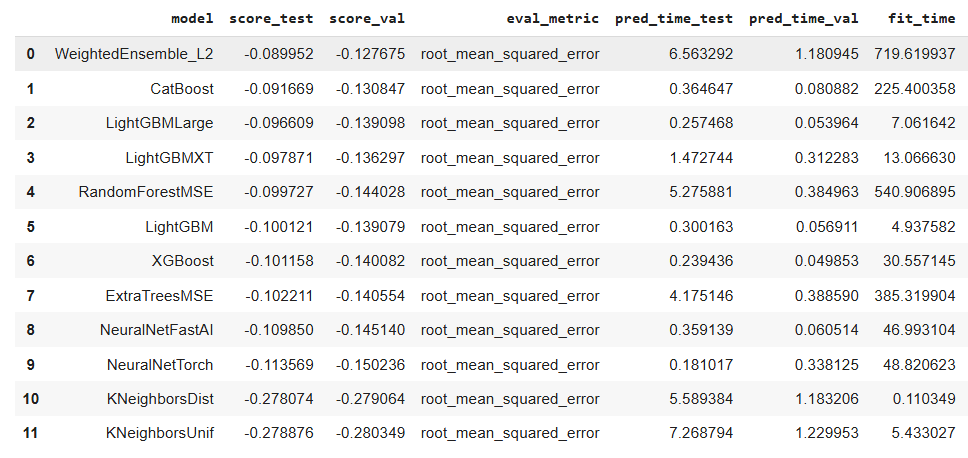

Feature Importance

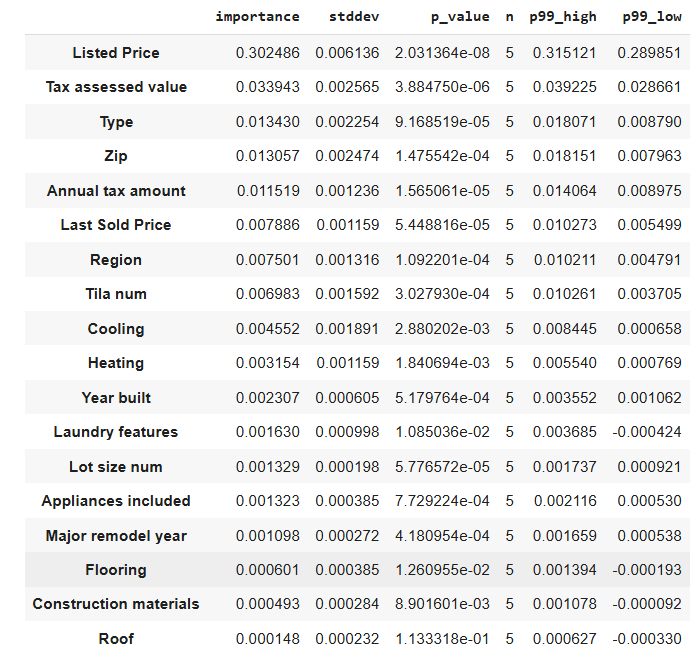

Final Score ($.0899$)

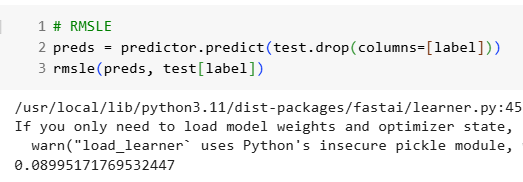